<a href="https://colab.research.google.com/github/astanwar99/machine-learning-exercises/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from mpl_toolkits import mplot3d

In [0]:
def sigmoid(x, w, b):
  return 1 / (1 + np.exp(-(w*x + b)))

In [61]:
sigmoid(1, 0.5, 0)

0.6224593312018546

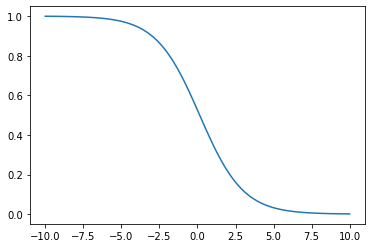

In [62]:
w = -0.7   #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.1    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

In [0]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w1, b)

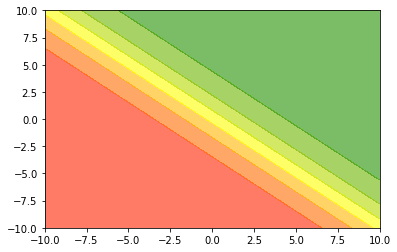

In [66]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
plt.contourf(XX1, XX2, Y, cmap=my_cmap, alpha=0.6)
plt.show()

Text(0.5, 0, 'z')

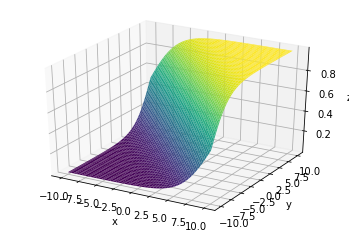

In [67]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [0]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) *20 - 10
Y = sigmoid(X, w_unknown, b_unknown) 

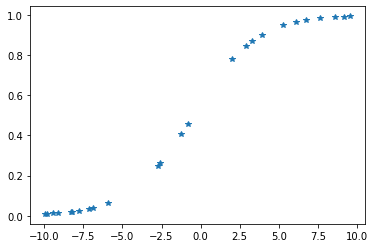

In [69]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calc_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)
WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calc_loss(X, Y, WW[i, j], BB[i, j])

Text(0.5, 0, 'loss')

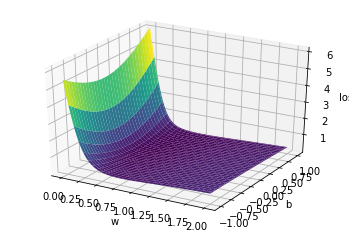

In [73]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

In [74]:
ij = np.argmin(Loss)
i = int(np.floor(ij / Loss.shape[1]))
j= int(ij - i * Loss.shape[1])

print(WW[i, j], BB[i, j])

0.5 0.24


In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y , epochs=1, lr=1, initialise=True):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      
      self.w -= lr * dw
      self.b -= lr * db

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  Y1 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap)
  plt.plot()

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

[[0.03311127 0.02859445]] [0.00051482]
[[ 0.70446008 -0.33408553]] [-0.00253472]
[[ 0.88608349 -0.18617209]] [-0.05694827]
[[ 0.91706155 -0.41170426]] [-0.11845073]
[[ 1.0620736  -0.25688896]] [-0.16458672]
[[ 1.07963339 -0.43322792]] [-0.21743623]
[[ 1.18172882 -0.33725527]] [-0.25637358]
[[ 1.20883498 -0.43120495]] [-0.29788817]
[[ 1.27264563 -0.40236148]] [-0.33102552]
[[ 1.30879329 -0.43805138]] [-0.36370638]
[[ 1.35217726 -0.44215668]] [-0.39261827]
[[ 1.38841125 -0.45718781]] [-0.4198743]
[[ 1.42344058 -0.46761381]] [-0.44507551]
[[ 1.45589244 -0.47828674]] [-0.46864437]
[[ 1.48643711 -0.48813034]] [-0.49071176]
[[ 1.51521336 -0.49743289]] [-0.51144436]
[[ 1.54241536 -0.50622391]] [-0.53097597]
[[ 1.56819898 -0.51455685]] [-0.54942388]
[[ 1.59269932 -0.52247529]] [-0.56689007]
[[ 1.61603342 -0.53001713]] [-0.58346373]
[[ 1.63830336 -0.53721539]] [-0.59922312]
[[ 1.65959865 -0.54409905]] [-0.61423728]
[[ 1.6799982  -0.55069362]] [-0.62856729]
[[ 1.69957189 -0.5570217 ]] [-0.642267

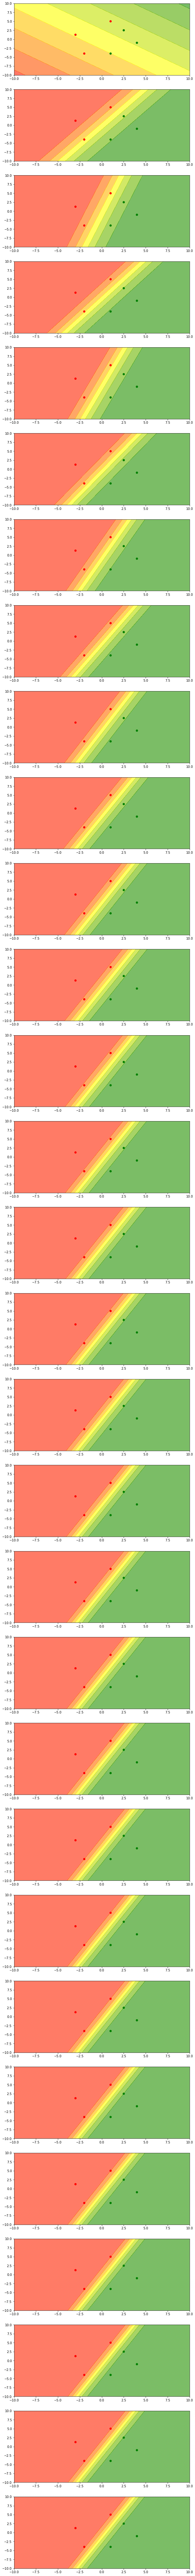

In [81]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)